F2 test of similarity of correlation coefficients

In [1]:
import numpy as np
import pymc as pm
import arviz as az

def bayesian_f2_test(r1, n1, r2, n2, num_samples=1000):
    """
    Perform a Bayesian f^2 test to determine if two correlations are more similar than expected by chance.

    Parameters:
    r1 (float): Correlation coefficient of the first sample.
    n1 (int): Sample size of the first sample.
    r2 (float): Correlation coefficient of the second sample.
    n2 (int): Sample size of the second sample.
    num_samples (int): Number of posterior samples to draw.

    Returns:
    az.InferenceData: The posterior inference data.
    """
    
    # Fisher Z-transform
    Z1 = 0.5 * np.log((1 + r1) / (1 - r1))
    Z2 = 0.5 * np.log((1 + r2) / (1 - r2))

    # Calculate the variances of the Fisher Z-transformed correlations
    var_z1 = 1 / (n1 - 3)
    var_z2 = 1 / (n2 - 3)

    # Combined variance of the difference
    var_diff = var_z1 + var_z2
    sigma_diff = np.sqrt(var_diff)
    
    # Observed difference in Z-scores
    Z_diff = Z1 - Z2

    # Bayesian Model
    with pm.Model() as model:
        # Prior for delta (the difference in Z-scores)
        delta = pm.Normal('delta', mu=0, sigma=1)
        
        # Likelihood
        likelihood = pm.Normal('likelihood', mu=delta, sigma=sigma_diff, observed=Z_diff)
        
        # Posterior Inference
        trace = pm.sample(num_samples, return_inferencedata=True)

    return trace

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Matplotlib is building the font cache; this may take a moment.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [delta]


/Users/cu135/bayesian_stats_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


<Axes: title={'center': 'delta'}>

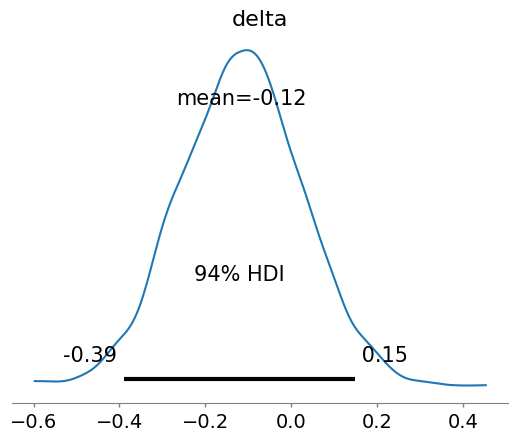

In [8]:

# Example usage
r1, n1 = 0.90, 100  # Correlation and sample size for the first sample
r2, n2 = 0.92, 100  # Correlation and sample size for the second sample
trace = bayesian_f2_test(r1, n1, r2, n2)

# Plotting posterior distribution of delta
az.plot_posterior(trace, var_names=['delta'])


In [9]:

# Print the summary
summary = az.summary(trace, hdi_prob=0.95)
display(summary)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
delta,-0.116,0.142,-0.378,0.183,0.003,0.002,1715.0,2657.0,1.0
